In [1]:
import numpy as np
import matplotlib.pyplot as plt
from thinkdsp import Chirp, normalize, unbias

In [2]:
class SawtoothChirp(Chirp):
    """Represents a sawtooth chirp, which is a signal with increasing (or decreasing) frequency."""

    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times

        returns: float wave array
        """
        freqs = np.linspace(self.start, self.end, len(ts))
        dts = np.diff(ts, prepend=0)
        dphis = 2 * np.pi * freqs * dts
        phases = np.cumsum(dphis)
        cycles = phases / (2 * np.pi)
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

In [3]:
signal = SawtoothChirp(start=660, end=1320)
wave = signal.make_wave(duration=1, framerate=4000)
wave.make_audio()

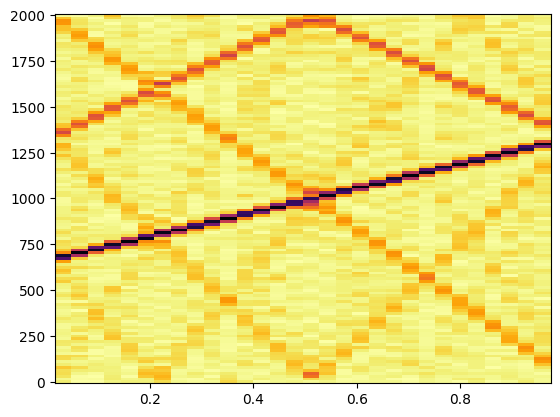

In [4]:
# Создаем спектрограмму сигнала
spectrogram = wave.make_spectrogram(seg_length=256)
spectrogram.plot()
